## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Job Performance Prediction

You work for a software startup, Predict All The Things Inc. (PALT), and are approached by the CEO to build an algorithm that can help sift through resumes. PALT just closed a $3 million Series A round of funding and the CEO just landed a deal with a national retailer, SellsALOT, to help them with hiring Sales Associates.

They are able to obtain data on all the employees that work as Sales Associates throughout their stores as well as customer satisfaction and sales performance scores.

In this case study, you are tasked with building a model to predict job performance to assist HR in selecting applicants to interview.

The data was provided to you by the new HR intern, Keegan. This is the email you got from Keegan with the attached data.

>Hi!
>
>I hope you're doing well. I've attached the data we have about all employees. Please ensure this data stays confidential and is not shared with anyone who has not signed the NDA. The columns have all the information we have about our employees and the scoring rating that they've received from our performance monitors. We also have some employees who were fired and I have included those as well.
>
>I was also able to dig up some more information about our employees that I found on the internet. It took a lot of time but I hope it helps in making the model even better. Can't wait to see this thing in action. Everyone here is very excited about our collaboration with you and we look forward to this making hiring a lot easier for us.
>
>Thanks,
>
>Keegan Thiel
>
>HR Intern
>
>Human Resources
>
>SellsALOT


Data is available in the `employees.csv` file provided. 


SellsALOT is an Equal Opportunity Employer which is an employer who agrees not to discriminate against any employee or job applicant based on race, color, religion, national origin, sex, physical or mental disability, or age.


## Import packages that are likely to be useful

### However, __do not__ use TensorFlow to build your models.

Below we import packages that are needed or may be useful. You may import additional packages as you see fit, with the exception of TensorFlow. You may use scikit-learn. **Ensure that you import additional packages in cells that say "### YOUR CODE HERE".**

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import datetime
from datetime import date

## Data Cleaning

First, let's investigate the data that we received from Keegan.

If you are using colab, **Make sure you upload the employees.csv file** so it can be loaded in the next cell. In order to do so, click the file folder icon in the colab sidebar. You will see the contents of the current directory, which will include a "sample_data" folder. Click the upload icon (piece of paper with upward pointing arrow, just below the word "Files"). Locate the employees.csv file that you downloaded from Canvas to your local machine and open/upload the file.

In [2]:
df = pd.read_csv("employees.csv")

In [3]:
df.head(10)

,First Name,Last Name,Date of Birth,Address,Zipcode,Gender,Race / Ethnicity,English Fluency,Spanish Fluency,Education,...,College GPA,Years of Experience,Years of Volunteering,Myers Briggs Type,Twitter followers,Instagram Followers,Requires Sponsorship,Customer Satisfaction Rating,Sales Rating,Fired
0,Sarah,Chang,1989-12-24,764 Howard Tunnel,30167,Female,Black,Fluent,Basic,High School,...,2.52,8.8,0.0,ISTJ,693,1108,False,2.21,2.07,Current Employee
1,Daniel,Taylor,1985-03-15,4892 Jessica Turnpike Suite 781,86553,Male,Black,Fluent,Basic,High School,...,3.90,13.7,0.0,ISFJ,507,1259,False,3.37,2.98,Current Employee
2,Heather,Stewart,1993-09-20,778 Linda Orchard Apt. 609,30167,Female,Black,Proficient,Basic,High School,...,2.63,5.2,0.0,INFP,599,868,False,1.50,1.36,Current Employee
3,Katherine,Dillon,1986-12-22,139 Linda Crossroad Suite 115,30167,Female,Black,Basic,Basic,High School,...,3.88,12.5,0.0,ISFP,1321,889,True,2.89,2.62,Current Employee
4,Sheri,Bolton,1991-02-24,1858 Lauren Orchard,60531,Female,Black,Proficient,Proficient,High School,...,3.30,7.0,0.0,ISFJ,414,13760,True,1.94,1.78,Current Employee
5,Donna,Davis,1996-05-26,4232 Tina Forks,86553,Female,Black,Proficient,Basic,Associates,...,3.14,1.6,0.0,ESTJ,495,2401,False,0.78,0.87,Current Employee
6,Benjamin,Shelton,1985-01-15,186 Warren Mount Apt. 396,30167,Male,Black,Proficient,Basic,Associates,...,3.51,13.1,0.0,ESFJ,1696,1158,False,3.41,3.11,Current Employee
7,Kevin,Hayes,1994-01-21,515 Tucker Plaza Suite 304,59010,Male,Black,Fluent,Basic,High School,...,2.92,4.1,0.0,ESTP,319,538,False,1.30,1.29,Current Employee
8,Autumn,Robinson,1996-05-05,0123 Audrey Union,60531,Female,Black,Fluent,Basic,None,...,NaN,3.0,0.0,ISFJ,988,510,False,0.89,0.63,Current Employee
9,Kimberly,Becker,1983-04-12,91615 Wilson Place,60531,Female,Black,Fluent,Basic,High School,...,2.97,14.8,0.0,INTP,1169,2254,False,3.59,3.40,Current Employee


In [4]:
df.describe(include="all")

,First Name,Last Name,Date of Birth,Address,Zipcode,Gender,Race / Ethnicity,English Fluency,Spanish Fluency,Education,...,College GPA,Years of Experience,Years of Volunteering,Myers Briggs Type,Twitter followers,Instagram Followers,Requires Sponsorship,Customer Satisfaction Rating,Sales Rating,Fired
count,2000,2000,2000,2000,2000.000000,2000,2000,2000,2000,2000,...,1645.000000,2000.000000,2000.000000,2000,2000.000000,2.000000e+03,2000,2000.000000,2000.00000,2000
unique,477,696,1701,2000,NaN,2,3,3,3,5,...,NaN,NaN,NaN,16,NaN,NaN,2,NaN,NaN,2
top,Michael,Smith,1988-12-07,07080 Jodi Ports Suite 756,NaN,Female,Black,Fluent,Basic,High School,...,NaN,NaN,NaN,ISFJ,NaN,NaN,False,NaN,NaN,Current Employee
freq,42,45,4,1,NaN,1201,1000,1183,1795,881,...,NaN,NaN,NaN,218,NaN,NaN,1813,NaN,NaN,1844
mean,NaN,NaN,NaN,NaN,53300.740500,NaN,NaN,NaN,NaN,NaN,...,3.251465,8.042550,0.263000,NaN,1065.144500,9.586589e+03,NaN,2.220175,2.06511,NaN
std,NaN,NaN,NaN,NaN,17455.384226,NaN,NaN,NaN,NaN,NaN,...,0.430466,4.674366,0.907487,NaN,7499.266485,2.269563e+05,NaN,1.058473,0.97946,NaN
min,NaN,NaN,NaN,NaN,24310.000000,NaN,NaN,NaN,NaN,NaN,...,2.500000,0.000000,0.000000,NaN,300.000000,5.000000e+02,NaN,0.000000,0.00000,NaN
25%,NaN,NaN,NaN,NaN,43357.000000,NaN,NaN,NaN,NaN,NaN,...,2.870000,3.900000,0.000000,NaN,364.000000,6.710000e+02,NaN,1.307500,1.25750,NaN
50%,NaN,NaN,NaN,NaN,55864.000000,NaN,NaN,NaN,NaN,NaN,...,3.270000,8.100000,0.000000,NaN,466.500000,9.925000e+02,NaN,2.250000,2.06000,NaN
75%,NaN,NaN,NaN,NaN,60531.000000,NaN,NaN,NaN,NaN,NaN,...,3.610000,12.100000,0.000000,NaN,769.250000,2.042000e+03,NaN,3.080000,2.86000,NaN


In [5]:
print("The columns of data are:")
list(df.columns)

The columns of data are:


['First Name',
 'Last Name',
 'Date of Birth',
 'Address',
 'Zipcode',
 'Gender',
 'Race / Ethnicity',
 'English Fluency',
 'Spanish Fluency',
 'Education',
 'High School GPA',
 'College GPA',
 'Years of Experience',
 'Years of Volunteering',
 'Myers Briggs Type',
 'Twitter followers',
 'Instagram Followers',
 'Requires Sponsorship',
 'Customer Satisfaction Rating',
 'Sales Rating',
 'Fired']

Before building any models, your manager has asked you to **convert all the feature data into formats that can easily be used for training and testing a variety of models**. This means:
1. Splitting the 16 Myers Briggs types into 4 subtypes
2. Converting categorical features into dummy binary features
3. Calculating age based on date of birth
4. Dealing with missing (NaN) values in the data

In addition, you should remove columns that contain redundant information after going through the process above, e.g., removing the 'Date of Birth' column after an 'Age' column is added.


### MBTI Splitting

The [Myers Briggs Type Indicator](https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator) (MBTI) descibes people as one of two types for each of:

* extraversion (E) or introversion (I)
* sensing (S) or intuition (N)
* thinking (T) or feeling (F)
* judgment (J) or perception (P)

It would make more sense for us to represent people as one or the other of these instead of creating all the possible cases. That way a model can learn based on each of those factors as well as their combination. 

Your next task is to split the MBTI column into four columns in the dataframe, with the following column names and values:

* MBTI_EI with value `E` or `I`
* MBTI_SN with value `S` or `N`
* MBTI_TF with value `T` or `F`
* MBTI_JP with value `J` or `P`

that correspond to the same row's Myers Briggs Type, and add those columns to your DataFrame, ```df```. Consider using the Series ```apply()``` method.

Afterwards, remove the original "Myers Briggs Type" column.

In [6]:
def convertMBT(df):
    for index, row in df.iterrows():
        if row['Myers Briggs Type'][0] == 'E':
            df.at[index,'MBTI_EI'] = 'E'
        else: df.at[index,'MBTI_EI'] = 'I'
        if row['Myers Briggs Type'][1] == 'S':
            df.at[index,'MBTI_SN'] = 'S'
        else: df.at[index,'MBTI_SN'] = 'N'
        if row['Myers Briggs Type'][2] == 'T':
            df.at[index,'MBTI_TF'] = 'T'
        else: df.at[index,'MBTI_TF'] = 'F'
        if row['Myers Briggs Type'][3] == 'J':
            df.at[index,'MBTI_JP'] = 'J'
        else: df.at[index,'MBTI_JP'] = 'P'
    df = df.drop('Myers Briggs Type', axis=1)
    return df
    
df = convertMBT(df)
df.head()

,First Name,Last Name,Date of Birth,Address,Zipcode,Gender,Race / Ethnicity,English Fluency,Spanish Fluency,Education,...,Twitter followers,Instagram Followers,Requires Sponsorship,Customer Satisfaction Rating,Sales Rating,Fired,MBTI_EI,MBTI_SN,MBTI_TF,MBTI_JP
0,Sarah,Chang,1989-12-24,764 Howard Tunnel,30167,Female,Black,Fluent,Basic,High School,...,693,1108,False,2.21,2.07,Current Employee,I,S,T,J
1,Daniel,Taylor,1985-03-15,4892 Jessica Turnpike Suite 781,86553,Male,Black,Fluent,Basic,High School,...,507,1259,False,3.37,2.98,Current Employee,I,S,F,J
2,Heather,Stewart,1993-09-20,778 Linda Orchard Apt. 609,30167,Female,Black,Proficient,Basic,High School,...,599,868,False,1.50,1.36,Current Employee,I,N,F,P
3,Katherine,Dillon,1986-12-22,139 Linda Crossroad Suite 115,30167,Female,Black,Basic,Basic,High School,...,1321,889,True,2.89,2.62,Current Employee,I,S,F,P
4,Sheri,Bolton,1991-02-24,1858 Lauren Orchard,60531,Female,Black,Proficient,Proficient,High School,...,414,13760,True,1.94,1.78,Current Employee,I,S,F,J


In [7]:
assert len(set(df["MBTI_EI"])) == 2
assert "E" in set(df["MBTI_EI"]) and "I" in set(df["MBTI_EI"])
assert len(set(df["MBTI_SN"])) == 2
assert "S" in set(df["MBTI_SN"]) and "N" in set(df["MBTI_SN"])
assert len(set(df["MBTI_TF"])) == 2
assert "T" in set(df["MBTI_TF"]) and "F" in set(df["MBTI_TF"])
assert len(set(df["MBTI_JP"])) == 2
assert "J" in set(df["MBTI_JP"]) and "P" in set(df["MBTI_JP"])
assert "Myers Briggs Type" not in list(df.columns)

1. ~~Splitting the 16 Myers Briggs types into 4 subtypes~~
2. Converting categorical features into dummy binary features
3. Calculating age based on date of birth
4. Dealing with missing (NaN) values in the data

### Categorical to Dummy Variables

Dummy variables are variables that allow us to convert a category into several binary variables. For example, if we had a color value that we were storing and we knew it could only have the values `red`, `green`, and `blue`, then instead of storing the color as those strings, we can store three binary variables: `is_red`, `is_green`, and `is_blue`. 

We can do this in pandas easily by using [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

In [8]:
# Review the DataFrame columns and identify the columns that contain categorical
# features and save them to a list called "categorical_columns".

# Categorical here means that there is a discrete (albeit large in some cases)
# number of possible options for the column that are not just 0 or 1

categorical_columns = ['Gender', 'Zipcode', 'Race / Ethnicity', 'English Fluency',
                       'Spanish Fluency', 'Education', 'MBTI_EI', 'MBTI_SN', 'MBTI_TF', 'MBTI_JP', 'Fired']




In [9]:
assert len(categorical_columns) > 8
for category in categorical_columns:
    assert category in df.columns

In [10]:
# Before we get the dummy variables, we need to make sure that all these 
# categorical columns are actually recognized by pandas to be of 'category' type.
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [11]:
# For every column in the categorical_columns,
# calculate the dummy variables and add them to the dataframe

dummies = pd.get_dummies(df[categorical_columns], drop_first=False)
df = pd.concat([df, dummies],axis=1)

In [12]:
assert len(list(df.columns)) > 45

In [13]:
print("The current columns are:")
list(df.columns)

The current columns are:


['First Name',
 'Last Name',
 'Date of Birth',
 'Address',
 'Zipcode',
 'Gender',
 'Race / Ethnicity',
 'English Fluency',
 'Spanish Fluency',
 'Education',
 'High School GPA',
 'College GPA',
 'Years of Experience',
 'Years of Volunteering',
 'Twitter followers',
 'Instagram Followers',
 'Requires Sponsorship',
 'Customer Satisfaction Rating',
 'Sales Rating',
 'Fired',
 'MBTI_EI',
 'MBTI_SN',
 'MBTI_TF',
 'MBTI_JP',
 'Gender_Female',
 'Gender_Male',
 'Zipcode_24310',
 'Zipcode_30167',
 'Zipcode_43357',
 'Zipcode_43711',
 'Zipcode_54821',
 'Zipcode_55864',
 'Zipcode_59010',
 'Zipcode_60531',
 'Zipcode_72361',
 'Zipcode_86553',
 'Race / Ethnicity_Black',
 'Race / Ethnicity_Caucasian',
 'Race / Ethnicity_Hispanic',
 'English Fluency_Basic',
 'English Fluency_Fluent',
 'English Fluency_Proficient',
 'Spanish Fluency_Basic',
 'Spanish Fluency_Fluent',
 'Spanish Fluency_Proficient',
 'Education_Associates',
 'Education_Graduate',
 'Education_High School',
 'Education_None',
 'Education_Und

In [14]:
# Now drop all the categorical features columns from the dataframe
# So that we don't have duplicate information stored

df = df.drop(categorical_columns, axis=1)

In [15]:
print("The current columns are:")
list(df.columns)

The current columns are:


['First Name',
 'Last Name',
 'Date of Birth',
 'Address',
 'High School GPA',
 'College GPA',
 'Years of Experience',
 'Years of Volunteering',
 'Twitter followers',
 'Instagram Followers',
 'Requires Sponsorship',
 'Customer Satisfaction Rating',
 'Sales Rating',
 'Gender_Female',
 'Gender_Male',
 'Zipcode_24310',
 'Zipcode_30167',
 'Zipcode_43357',
 'Zipcode_43711',
 'Zipcode_54821',
 'Zipcode_55864',
 'Zipcode_59010',
 'Zipcode_60531',
 'Zipcode_72361',
 'Zipcode_86553',
 'Race / Ethnicity_Black',
 'Race / Ethnicity_Caucasian',
 'Race / Ethnicity_Hispanic',
 'English Fluency_Basic',
 'English Fluency_Fluent',
 'English Fluency_Proficient',
 'Spanish Fluency_Basic',
 'Spanish Fluency_Fluent',
 'Spanish Fluency_Proficient',
 'Education_Associates',
 'Education_Graduate',
 'Education_High School',
 'Education_None',
 'Education_Undergraduate',
 'MBTI_EI_E',
 'MBTI_EI_I',
 'MBTI_SN_N',
 'MBTI_SN_S',
 'MBTI_TF_F',
 'MBTI_TF_T',
 'MBTI_JP_J',
 'MBTI_JP_P',
 'Fired_Current Employee',
 'Fi

In [16]:
assert 55 > len(list(df.columns)) > 30

1. ~~Splitting the 16 Myers Briggs types into 4 subtypes~~
2. ~~Converting categorical features into dummy binary features~~
3. Calculating age based on date of birth
4. Dealing with missing (NaN) values in the data

### Age Calculation

In [17]:
def calculate_age(born):
    """Calculates age based on date of birth using https://stackoverflow.com/a/9754466/818687

    Args:
        born (datetime): The date of birth

    Returns:
        int: The age based on date of birth
    """
    today = datetime.datetime.strptime("2020-11-20", "%Y-%m-%d")
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

Add an "Age" column to the dataframe, with the help of the ```calculate_age()``` function above. Afterwards, remove the "Date of Birth" column.

The input to ```calculate_age()``` should be a datetime object. Review the ```datetime.datetme.strptime()```
function and [format codes](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) to determine how to convert the "Date of Birth" date string into a datetime object.

In [18]:
for index, row in df.iterrows():
    dob = row['Date of Birth'].split("-")
    dob = date(int(dob[0]), int(dob[1]), int(dob[2]))
    df.at[index,'Age'] = calculate_age(dob)
    
df = df.drop(["Date of Birth"], axis=1)


In [19]:
assert df["Age"].min() == 22
assert df["Age"].max() == 38
assert df["Age"].median() == 30
assert "Date of Birth" not in list(df.columns)

1. ~~Splitting the 16 Myers Briggs types into 4 subtypes~~
2. ~~Converting categorical features into dummy binary features~~
3. ~~Calculating age based on date of birth~~
4. Dealing with missing (NaN) values in the data

## Handle NaN values

In [20]:
# Create a list of columns that contain NaN values

nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

['High School GPA', 'College GPA']


We see that data is not truly "missing" any values, but for people that did not attend or complete high school or college, there are no GPA values.

How should you deal with this? If you had a large number of people without GPAs, you might consider making separate models for people with GPAs and for people without. For this case, your manager asks you to make sure there's one model for everyone. She recommends one of the following options:

1. Replace NaN values with the mean value of all the non-NaN values.
1. Replace NaN values with 0
1. Replace NaN values with some other value
1. Create a model to predict people's GPA values from other attributes and fill them in with those values

Consider the assumptions of each approach:
1. Replacing with the mean assumes that that person would receive the average of others who work at this company.
1. Replacing with 0 assumes that that person would fail if they attended high school or college.
1. Replacing with some arbitrary value will have assumptions based on what that value is
1. Creating a model to predict people's GPA values from the other attributes in the data assumes that those attributes are predictive of GPA. 


Regardless of the approach you take, just make sure there are no more NaN values. 

In [21]:
# For each of the two columns that contain NaN values, replace the NaN values
# with numerical values, using one of the approaches above, or some other approach
# that you devise yourself.

df.fillna(df.mean(), inplace=True)
for col in nan_columns:
    assert not df[col].isna().any()

In [22]:
for col in nan_columns:
    assert not df[col].isna().any()

In [23]:
# Describe the approach you chose and why and save that as a string called nan_filling_approach
nan_filling_approach = f'''I filled all the nan_columns with the average value in the column'''
print(nan_filling_approach)

I filled all the nan_columns with the average value in the column


In [24]:
assert len(nan_filling_approach) > 30

## Modeling

### Interviewing model(s)

Having completed the conversion of the data into a format that can be used with machine learning models, your manager asks that you build three seperate models which predict the following three targets, respectively:

1. Customer Satisfaction
1. Sales Performance
1. Fired

In [25]:
# Save the names of columns we are trying to predict to a list called "targets".
# Make sure that if we had a categorical column, that you use the dummy representation(s)
targets = ['Customer Satisfaction Rating',
           'Sales Rating',
           'Fired_Fired']

In [26]:
assert len(targets) == 3
for target in targets:
    assert target in df.columns

Ultimately, the predictions of your models will be used to rank applicants for interviews with HR.

**Which features will you select to use in your model?** You will specify them below.

In [27]:
print("The available columns are:")
list(df)

The available columns are:


['First Name',
 'Last Name',
 'Address',
 'High School GPA',
 'College GPA',
 'Years of Experience',
 'Years of Volunteering',
 'Twitter followers',
 'Instagram Followers',
 'Requires Sponsorship',
 'Customer Satisfaction Rating',
 'Sales Rating',
 'Gender_Female',
 'Gender_Male',
 'Zipcode_24310',
 'Zipcode_30167',
 'Zipcode_43357',
 'Zipcode_43711',
 'Zipcode_54821',
 'Zipcode_55864',
 'Zipcode_59010',
 'Zipcode_60531',
 'Zipcode_72361',
 'Zipcode_86553',
 'Race / Ethnicity_Black',
 'Race / Ethnicity_Caucasian',
 'Race / Ethnicity_Hispanic',
 'English Fluency_Basic',
 'English Fluency_Fluent',
 'English Fluency_Proficient',
 'Spanish Fluency_Basic',
 'Spanish Fluency_Fluent',
 'Spanish Fluency_Proficient',
 'Education_Associates',
 'Education_Graduate',
 'Education_High School',
 'Education_None',
 'Education_Undergraduate',
 'MBTI_EI_E',
 'MBTI_EI_I',
 'MBTI_SN_N',
 'MBTI_SN_S',
 'MBTI_TF_F',
 'MBTI_TF_T',
 'MBTI_JP_J',
 'MBTI_JP_P',
 'Fired_Current Employee',
 'Fired_Fired',
 'Age'

In [28]:
# Enter all the features you want to use in a list and save it to "interview_features".
# These are the features for the models that will predict the targets, and the
# predictions will be used to rank applicants for **interviews**.
interview_features = ['High School GPA', 'College GPA', 'Years of Experience', 'Years of Volunteering', 
                      'Twitter followers', 'Instagram Followers', 'Requires Sponsorship', 'English Fluency_Basic', 
                      'English Fluency_Fluent', 'English Fluency_Proficient', 'Spanish Fluency_Basic', 
                      'Spanish Fluency_Fluent', 'Spanish Fluency_Proficient', 'Education_Associates', 
                      'Education_Undergraduate', 'MBTI_EI_E', 'MBTI_EI_I', 'MBTI_SN_N', 'MBTI_SN_S', 
                      'MBTI_TF_F', 'MBTI_TF_T', 'MBTI_JP_J', 'Age']

Why did you choose the features you did?

In [29]:
## Save your reasoning in a string to the variable interview_reason
interview_reason = f'''I used almost all of the features in my models are they ended up performing the best when 
using them all. I did remove ethically concerned data like: Name, address, gender, and others. I planned to tune the hiring
model with a different set of hyperparameters to optimize a different result. Because candidates can be cross validated in
an interview and it would be bad to through out borderline cases, the classifier is optimized for recall instead of f1.'''

In [30]:
assert isinstance(interview_reason, str)
assert len(interview_reason) > 20

In [31]:
# Perform a train and test split on the data with the variable names:
# interview_x_train for the training features
# interview_x_test for the testing features
# interview_y_train for the training targets
# interview_y_test for the testing targets
# The test dataset should be 20% of the total dataset
interview_x_train, interview_x_test, interview_y_train, interview_y_test = train_test_split(df[interview_features], df[targets], test_size=0.2)
interview_x_train.head()

,High School GPA,College GPA,Years of Experience,Years of Volunteering,Twitter followers,Instagram Followers,Requires Sponsorship,English Fluency_Basic,English Fluency_Fluent,English Fluency_Proficient,...,Education_Associates,Education_Undergraduate,MBTI_EI_E,MBTI_EI_I,MBTI_SN_N,MBTI_SN_S,MBTI_TF_F,MBTI_TF_T,MBTI_JP_J,Age
705,3.010359,3.251465,12.9,0.0,633,625,True,0,0,1,...,0,0,0,1,0,1,1,0,0,35.0
1288,3.940000,2.540000,1.1,3.5,338,1016,False,0,1,0,...,0,1,0,1,0,1,1,0,1,24.0
946,3.010359,3.251465,7.6,0.0,683,11762,False,0,0,1,...,0,0,1,0,0,1,0,1,0,29.0
1497,3.690000,3.720000,5.5,0.0,1995,699,False,0,1,0,...,0,0,0,1,0,1,0,1,1,28.0
723,3.010359,3.251465,13.3,0.0,683,5429,False,1,0,0,...,0,0,0,1,0,1,1,0,0,35.0


In [32]:
assert (len(interview_x_train) / (len(interview_x_test) + len(interview_x_train))) == 0.8
assert (len(interview_y_train) / (len(interview_y_test) + len(interview_y_train))) == 0.8
assert len(interview_x_train) == len(interview_y_train)
assert len(interview_x_test) == len(interview_y_test)

Build and train your interviewing models.

In [33]:
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate

from matplotlib import pyplot
import numpy as np

from IPython.display import display, Javascript
def preventScrolling():
    disable_js = """
    IPython.OutputArea.prototype._should_scroll = function(lines) {
        return false;
    }
    """
    display(Javascript(disable_js))

preventScrolling()

def evaluate(model, test_features, scoring='r2', plot=True):
    results = (cross_validate(model, interview_x_test, test_features, cv=5, scoring=scoring))
    for method in scoring:
        print(f'''{method}: {np.max(results['test_'+method])}''') 

def hyperparameter_search(model, x, y, params, scorer='r2', cv=5, verbose=0, method="grid", plot=True, n_iters=50000):
    if method == 'random':
        search = RandomSearchCV(model, params, scoring=scorer, n_jobs=-1, cv=cv, verbose=3, n_iters=n_iters).fit(x, y)
    else:
        search = GridSearchCV(model, params, scoring=scorer, n_jobs=-1, cv=cv, verbose=3).fit(x, y)
    
    if verbose > 0:
        print('\n Best estimator:')
        print(search.best_estimator_)
        print('\n Best hyperparameters:')
        print(search.best_params_)
    if verbose > 1:
        print("Search Results:")
        print(search.cv_results_)
        
    if plot:
        plot_importance(search.best_estimator_)
        pyplot.show()
        
    return search.best_estimator_, search.best_params_


regressor_parameters = {
    'learning_rate': [0.01, 0.02, 0.225, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10, 15],
    'subsample': [0.25, 0.5, 0.75, 1],
    'base_score': [0.25, 0.5, 0.75, 0.9, 0.99],
    'n_estimators': [100, 500, 1000, 1500, 2000],
    'gamma': [0, 0.25, 0.5, 1, 1.5, 2],
    'num_parallel_tree': [1, 2, 4]
}

classifier_params = {
    'min_child_weight': [1, 1.5, 2, 2.5, 3, 3.5, 5, 10],
    'gamma': [0, 0.25, 0.5, 0.75, 1, 1.5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.02, 0.225, 0.3],
    'n_estimators': [50, 100, 500, 1000],
    'base_score': [0.25, 0.5, 0.75, 0.9, 0.99]
}

<IPython.core.display.Javascript object>

In [34]:
"""

 Best estimator:
 
 F1
 XGBClassifier(base_score=0.99, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=0)

ROC_AUC
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=0)

RECALLL
 Best estimator:
XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=0)
              
              
PRECISION
XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=0)
 
 
XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=0)

XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=0)
              
"""


classifiers = {}

classifiers['f1'] = XGBClassifier(n_jobs=-1, nthread=-1,
                                  objective='binary:logistic', base_score=0.99, booster='gbtree', colsample_bylevel=1,
                                  colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1, importance_type='gain',
                                  learning_rate=0.225, max_delta_step=0, max_depth=5, min_child_weight=1, n_estimators=50,
                                  verbosity=0).fit(interview_x_train, interview_y_train['Fired_Fired'])

classifiers['roc_auc'] = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                       colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
                                       importance_type='gain', learning_rate=0.3, max_delta_step=0, max_depth=3, min_child_weight=1,
                                       n_estimators=50, n_jobs=-1, nthread=-1, subsample=0.8,
                                       verbosity=0).fit(interview_x_train, interview_y_train['Fired_Fired'])

classifiers['recall'] = XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
                                      colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
                                      importance_type='gain', learning_rate=0.01, max_depth=3, min_child_weight=1,
                                      n_estimators=50, n_jobs=-1, nthread=-1, subsample=0.8,
                                      verbosity=0).fit(interview_x_train, interview_y_train['Fired_Fired'])

classifiers['precision'] = XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
                                         colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
                                         importance_type='gain', learning_rate=0.225, max_delta_step=0, max_depth=8, min_child_weight=0.5,
                                         n_estimators=1000, n_jobs=-1, nthread=-1, subsample=0.9,
                                         verbosity=0).fit(interview_x_train, interview_y_train['Fired_Fired'])


for optimizer in classifiers:
    evaluate(classifiers[optimizer],
             interview_y_test['Fired_Fired'], ['f1', 'roc_auc', 'recall', 'precision'])

f1: 0.4444444444444445
roc_auc: 0.7612524461839532
recall: 0.2857142857142857
precision: 1.0
f1: 0.4
roc_auc: 0.7475538160469667
recall: 0.2857142857142857
precision: 0.6666666666666666
f1: 0.16091954022988506
roc_auc: 0.8297455968688846
recall: 1.0
precision: 0.0875
f1: 0.4444444444444445
roc_auc: 0.7534246575342466
recall: 0.2857142857142857
precision: 1.0


In [35]:
"""

sat
XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=-1, num_parallel_tree=4, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.25, verbosity=1)
             
sales
XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=-1, num_parallel_tree=4, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.25, verbosity=1)
             

 Best estimator: satisfaction
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
             
 Best estimator: sales
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

"""

satisfaction_model = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
                                  colsample_bynode=1, colsample_bytree=1, gamma=0,
                                  importance_type='gain', learning_rate=0.02, max_delta_step=0,
                                  max_depth=3, min_child_weight=5, n_estimators=2000,
                                  n_jobs=-1, nthread=-1, num_parallel_tree=4, objective='reg:linear',
                                  subsample=0.25, verbosity=0).fit(interview_x_train, interview_y_train['Customer Satisfaction Rating'])
evaluate(satisfaction_model,
         interview_y_test['Customer Satisfaction Rating'], ['r2'])

sales_model = XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
                           colsample_bynode=1, colsample_bytree=1, gamma=0,
                           importance_type='gain', learning_rate=0.02, max_delta_step=0,
                           max_depth=3, min_child_weight=5, missing=None, n_estimators=2000,
                           n_jobs=-1, nthread=-1, num_parallel_tree=4, objective='reg:linear',
                           subsample=0.25, verbosity=0).fit(interview_x_train, interview_y_train['Sales Rating'])
evaluate(sales_model,
         interview_y_test['Sales Rating'], ['r2'])

r2: 0.9930652201041176
r2: 0.9870170327742741


In [36]:
# Determine an appropriate metric for measuring your performance for each
# model/target, and report the test score for that metric. The metric may be
# different for each model/target.

my_interview_models = [satisfaction_model, sales_model, classifiers['recall']]



Customer Satisfaction Rating

--------------------------------------------------------------------------------

XGBoost Regressor
r2: 0.9930652201041176
neg_root_mean_squared_error: -0.08692361461834656
max_error: -0.2550804591178894


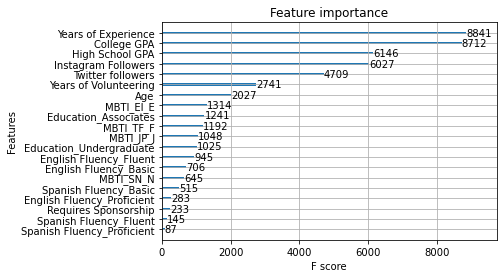



I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
    


Sales Rating

--------------------------------------------------------------------------------

XGBoost Regressor
r2: 0.9870170327742741
neg_roo

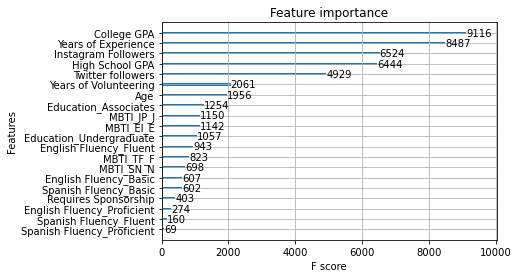



I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints='',
         learning_rate=0.02, max_delta_step=0, max_depth=5,
         min_child_weight=10, missing=nan, monotone_constraints='()',
         n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
         tree_method='exact', validate_parameters=1, verbosity=None)
    


Fired_Fired

--------------------------------------------------------------------------------

XGBoost Classifier
roc_auc: 0.8297455968688846
f1: 0.16091954022988506
recall

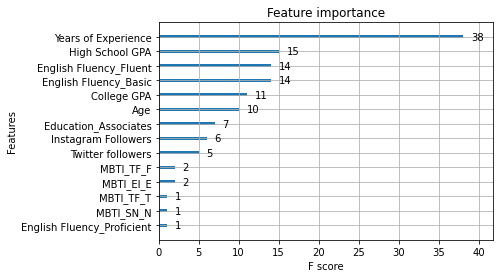



Because being fired is a binary classification, I used the XGBoost Classfier. I tried other classifiers, but like
    before, the XGBoost method performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen 
    hyperparameters were: 
    XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=0)
    


In [37]:
# You should use multiple print messages to print something like the
# following for each of your models/targets:
#
# To predict the target (target), I trained a (model) model
# and determined the best hyperparameters as (param1 = p1), (param2 = p2)...
# resulting in a (metric) score of (score).

model_names = [ "XGBoost Regressor", "XGBoost Regressor", "XGBoost Classifier"]
model_reasoning = [
    f'''I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
    ''',
    f'''I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints='',
         learning_rate=0.02, max_delta_step=0, max_depth=5,
         min_child_weight=10, missing=nan, monotone_constraints='()',
         n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
         tree_method='exact', validate_parameters=1, verbosity=None)
    ''',
    f'''Because being fired is a binary classification, I used the XGBoost Classfier. I tried other classifiers, but like
    before, the XGBoost method performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen 
    hyperparameters were: 
    XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=0)
    '''
]
scorers = [
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['roc_auc', 'f1', 'recall', 'precision']
]
choices = ['Customer Satisfaction Rating', 'Sales Rating', 'Fired_Fired']
for i, model in enumerate(my_interview_models):
    print('\n'+"="*80+'\n')
    print(choices[i])
    print('\n'+"-"*80+'\n')
    print(model_names[i])
    evaluate(model, interview_y_test[choices[i]],scorers[i])
    plot_importance(model)
    pyplot.show()
    print('\n')
    print(model_reasoning[i])

In [38]:
assert len(my_interview_models)==len(targets)

### Hiring model(s)

You manager tells you that SellsALOT has decided they wish to consider doing away with interviews altogether, in order to save money. SellsALOT would like a model that will be used to rank candidates for directly hiring them, rather than for interviewing them.

Will your choice of features changes?

**Which features will you select to use in that model?** You will specify them below.

In [39]:
print("The available columns are:")
list(df)

The available columns are:


['First Name',
 'Last Name',
 'Address',
 'High School GPA',
 'College GPA',
 'Years of Experience',
 'Years of Volunteering',
 'Twitter followers',
 'Instagram Followers',
 'Requires Sponsorship',
 'Customer Satisfaction Rating',
 'Sales Rating',
 'Gender_Female',
 'Gender_Male',
 'Zipcode_24310',
 'Zipcode_30167',
 'Zipcode_43357',
 'Zipcode_43711',
 'Zipcode_54821',
 'Zipcode_55864',
 'Zipcode_59010',
 'Zipcode_60531',
 'Zipcode_72361',
 'Zipcode_86553',
 'Race / Ethnicity_Black',
 'Race / Ethnicity_Caucasian',
 'Race / Ethnicity_Hispanic',
 'English Fluency_Basic',
 'English Fluency_Fluent',
 'English Fluency_Proficient',
 'Spanish Fluency_Basic',
 'Spanish Fluency_Fluent',
 'Spanish Fluency_Proficient',
 'Education_Associates',
 'Education_Graduate',
 'Education_High School',
 'Education_None',
 'Education_Undergraduate',
 'MBTI_EI_E',
 'MBTI_EI_I',
 'MBTI_SN_N',
 'MBTI_SN_S',
 'MBTI_TF_F',
 'MBTI_TF_T',
 'MBTI_JP_J',
 'MBTI_JP_P',
 'Fired_Current Employee',
 'Fired_Fired',
 'Age'

In [40]:
# Enter all the features you want to use in a list and save it to "hire_features".
# These are the features for the models that will predict the targets, and the
# predictions will be used to rank applicants for **hiring**.

hire_features = ['High School GPA', 'College GPA', 'Years of Experience', 'Years of Volunteering', 
                      'Twitter followers', 'Instagram Followers', 'Requires Sponsorship', 'English Fluency_Basic', 
                      'English Fluency_Fluent', 'English Fluency_Proficient', 'Spanish Fluency_Basic', 
                      'Spanish Fluency_Fluent', 'Spanish Fluency_Proficient', 'Education_Associates', 
                      'Education_Undergraduate', 'MBTI_EI_E', 'MBTI_EI_I', 'MBTI_SN_N', 'MBTI_SN_S', 
                      'MBTI_TF_F', 'MBTI_TF_T', 'MBTI_JP_J', 'Age']

Why did you choose the features you did?

In [41]:
## Save your reasoning in a string to the variable hire_reason

hire_reason = f'''Although I am using the same features, but will be using a different metric for optimizing my GridSearch
which is the main difference between the two sets of models. Because there isn't a process to cross check the people with 
a high change of being fired like there would be in an interview, I switched the optimization metic to ROC AUC. This metric is used to optimize for the greatest amount of TP and TN.
The reason for using the same feature set is also simply because the models performed the best when the above features 
were selected. I also excluded any ethically concerning data like before.'''

In [42]:
assert isinstance(hire_reason, str)
assert len(hire_reason) > 20

Why was your choice different from or the same as the interviewing features?


In [43]:
# Save your reasoning in a string to the variable
# same_reason if the features are the same, or
# different_reason if the features are different.
same_reason = hire_reason

In [44]:
if all([rf in hire_features for rf in interview_features]) and all([sf in interview_features for sf in hire_features]):
    print("Your features for interviewing and hiring are the same.")
    assert isinstance(same_reason, str)
    assert len(same_reason) > 20
else:
    print("Your features for interviewing and hiring are different.")
    assert isinstance(different_reason, str)
    assert len(different_reason) > 20

Your features for interviewing and hiring are the same.


In [45]:
# Perform a train and test split on the data with the variable names:
# The test dataset should be 20% of the total dataset

hire_x_train, hire_x_test, hire_y_train, hire_y_test = train_test_split(df[hire_features], df[targets], test_size=0.2)
hire_x_train.head()

,High School GPA,College GPA,Years of Experience,Years of Volunteering,Twitter followers,Instagram Followers,Requires Sponsorship,English Fluency_Basic,English Fluency_Fluent,English Fluency_Proficient,...,Education_Associates,Education_Undergraduate,MBTI_EI_E,MBTI_EI_I,MBTI_SN_N,MBTI_SN_S,MBTI_TF_F,MBTI_TF_T,MBTI_JP_J,Age
375,2.260000,3.700000,13.1,0.0,510,715,True,0,0,1,...,0,0,0,1,0,1,0,1,1,36.0
146,3.010359,3.251465,13.2,0.0,345,2811,False,0,0,1,...,0,0,0,1,1,0,1,0,1,36.0
363,2.690000,2.940000,4.0,0.0,5525,1617,False,0,1,0,...,0,0,1,0,0,1,0,1,1,26.0
875,3.490000,3.530000,9.8,0.0,415,1303,False,1,0,0,...,0,0,1,0,0,1,1,0,0,30.0
950,3.670000,2.900000,8.7,0.0,750,2868,False,0,0,1,...,1,0,1,0,0,1,0,1,0,29.0


In [46]:
assert (len(hire_x_train) / (len(hire_x_test) + len(hire_x_train))) == 0.8
assert (len(hire_y_train) / (len(hire_y_test) + len(hire_y_train))) == 0.8
assert len(hire_x_train) == len(hire_y_train)
assert len(hire_x_test) == len(hire_y_test)

Build and train your hiring models.

Do you expect this model to perform differently?



Customer Satisfaction Rating

--------------------------------------------------------------------------------

XGBoost Regressor
r2: 0.9938153331998246
neg_root_mean_squared_error: -0.07877006777941022
max_error: -0.2547267436981202


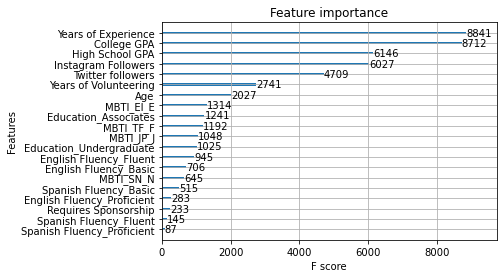



I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
    


Sales Rating

--------------------------------------------------------------------------------

XGBoost Regressor
r2: 0.9858590064724978
neg_roo

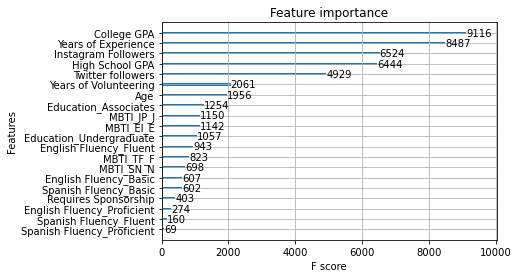



I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints='',
         learning_rate=0.02, max_delta_step=0, max_depth=5,
         min_child_weight=10, missing=nan, monotone_constraints='()',
         n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
         tree_method='exact', validate_parameters=1, verbosity=None)
    


Fired_Fired

--------------------------------------------------------------------------------

XGBoost Classifier
roc_auc: 0.728
f1: 0.33333333333333337
recall: 0.2
precisi

C:\Users\Carson\Anaconda3\envs\NN\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


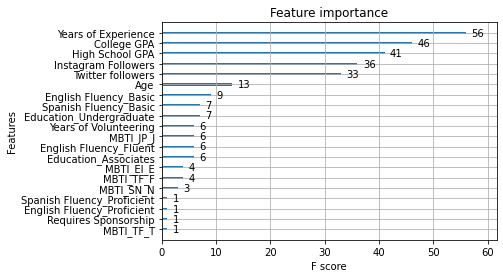



Because being fired is a binary classification, I used the XGBoost Classfier. I tried other classifiers, but like
    before, the XGBoost method performed the best. I used a GridSearch to find the optimal hyperparameters. I chose to use
    the ROC AUC metric because if we care about true negatives as much as we care about true positives then it totally makes
    sense to use ROC AUC; it will score candidates more carefully erroring on the side of surity when there isn't an 
    interview for validation. The hyperparameters were: 
    XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state

In [72]:
# Determine an appropriate metric for measuring your performance for each
# model/target, and report the test score for that metric. The metric may be
# different for each model/target.
#
# Save your models in a list, with models ordered in the same manner as above.


def evaluate(model, test_features, scoring=['r2', 'neg_root_mean_squared_error', 'max_error']):
    results = (cross_validate(model, hire_x_test, test_features, cv=5, scoring=scoring))
    for method in scoring:
        print(f'''{method}: {np.max(results['test_'+method])}''')
        
my_hiring_models = [satisfaction_model, sales_model, classifiers['roc_auc']]

model_names = [ "XGBoost Regressor", "XGBoost Regressor", "XGBoost Classifier"]
model_reasoning = [
    f'''I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
    ''',
    f'''I used a Regressor because the target value was continuous. I tried several different methods and feature sets,
    but each time, the XGBoost Regressor model performed the best. I used a GridSearch to find the optimal hyperparameters. The chosen hyperparameters were: 
    XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
         importance_type='gain', interaction_constraints='',
         learning_rate=0.02, max_delta_step=0, max_depth=5,
         min_child_weight=10, missing=nan, monotone_constraints='()',
         n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
         tree_method='exact', validate_parameters=1, verbosity=None)
    ''',
    f'''Because being fired is a binary classification, I used the XGBoost Classfier. I tried other classifiers, but like
    before, the XGBoost method performed the best. I used a GridSearch to find the optimal hyperparameters. I chose to use
    the ROC AUC metric because if we care about true negatives as much as we care about true positives then it totally makes
    sense to use ROC AUC; it will score candidates more carefully erroring on the side of surity when there isn't an 
    interview for validation. The hyperparameters were: 
    XGBClassifier(base_score=0.999, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.225, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=0)
    '''
]
scorers = [
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['roc_auc', 'f1', 'recall', 'precision']
]
choices = ['Customer Satisfaction Rating', 'Sales Rating', 'Fired_Fired']
for i, model in enumerate(my_hiring_models):
    print('\n'+"="*80+'\n')
    print(choices[i])
    print('\n'+"-"*80+'\n')
    print(model_names[i])
    evaluate(model, hire_y_test[choices[i]],scorers[i])
    plot_importance(model)
    pyplot.show()
    print('\n')
    print(model_reasoning[i])

In [73]:
assert len(my_hiring_models)==len(targets)

In [74]:
# Follow this up with a comparison between the performance (test scores) on your
# two sets of models.
#
# You should print something like, for each of the targets:
#   Using interview features for target (target) the model scored (score)
#   versus using the hiring features where it scored (score)
def evaluate(model, x, y, scoring=['r2', 'neg_root_mean_squared_error', 'max_error']):
    results = (cross_validate(model, x, y, cv=5, scoring=scoring))
    for method in scoring:
        print(f'''{method}: {np.max(results['test_'+method])}''')
        
model_names = [ "XGBoost Regressor", "XGBoost Regressor", "XGBoost Classifier"]
scorers = [
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['r2', 'neg_root_mean_squared_error', 'max_error'],
    ['roc_auc', 'f1', 'recall', 'precision']
]
choices = ['Customer Satisfaction Rating', 'Sales Rating', 'Fired_Fired']
for i, model in enumerate(my_interview_models):
    print('\n'+"="*80)
    print(choices[i])
    print('\n'+"-"*80+'\n')
    print(model_names[i], "\tInterview Model\n")
    evaluate(my_interview_models[i], interview_x_test, interview_y_test[choices[i]],scorers[i])
    print('\n'+"*"*80)
    print(model_names[i], "\tHiring Model\n")
    evaluate(my_hiring_models[i], hire_x_test, hire_y_test[choices[i]],scorers[i])
    print("\n\n")


Customer Satisfaction Rating

--------------------------------------------------------------------------------

XGBoost Regressor 	Interview Model

r2: 0.9930652201041176
neg_root_mean_squared_error: -0.08692361461834656
max_error: -0.2550804591178894

********************************************************************************
XGBoost Regressor 	Hiring Model

r2: 0.9938153331998246
neg_root_mean_squared_error: -0.07877006777941022
max_error: -0.2547267436981202




Sales Rating

--------------------------------------------------------------------------------

XGBoost Regressor 	Interview Model

r2: 0.9870170327742741
neg_root_mean_squared_error: -0.10254220762534792
max_error: -0.3210410976409914

********************************************************************************
XGBoost Regressor 	Hiring Model

r2: 0.9858590064724978
neg_root_mean_squared_error: -0.11071789626191036
max_error: -0.4132187271118166




Fired_Fired

----------------------------------------------------

C:\Users\Carson\Anaconda3\envs\NN\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

In this section we'll create example applicants and see how they would fare based on their applications and your models. First, let's create some example applications. We've created four applicants, and you'll need to create a fifth one in the cell below.

In [50]:
applicant_1 = {
    'First Name': "Stefon",
    'Last Name': "Smith",
    'Date of Birth': "1989-12-24",
    'Address': "4892 Jessica Turnpike Suite 781",
    'Zipcode': 86553,
    'Gender': "Male",
    'Race / Ethnicity': "Caucasian",
    'English Fluency': "Proficient",
    'Spanish Fluency': "Basic",
    'Education': "Associates",
    'High School GPA': 2.9,
    'College GPA': 3.1,
    'Years of Experience': 5,
    'Years of Volunteering': 2,
    'Myers Briggs Type': "ESFJ",
    'Twitter followers': 524,
    'Instagram Followers': 857,
    'Requires Sponsorship': True
}
applicant_2 = {
    'First Name': "Sarah",
    'Last Name': "Chang",
    'Date of Birth': "1995-04-13",
    'Address': "9163 Rebecca Loop",
    'Zipcode': 43711,
    'Gender': "Female",
    'Race / Ethnicity': "Hispanic",
    'English Fluency': "Fluent",
    'Spanish Fluency': "Fluent",
    'Education': "Undergraduate",
    'High School GPA': 4.0,
    'College GPA': 3.8,
    'Years of Experience': 5,
    'Years of Volunteering': 0,
    'Myers Briggs Type': "ISTJ",
    'Twitter followers': 97,
    'Instagram Followers': 204,
    'Requires Sponsorship': False
}
applicant_3 = {
    'First Name': "Daniel",
    'Last Name': "Richardson",
    'Date of Birth': "1998-10-23",
    'Address': "436 Lauren Stream",
    'Zipcode': 54821,
    'Gender': "Male",
    'Race / Ethnicity': "Black",
    'English Fluency': "Fluent",
    'Spanish Fluency': "Proficient",
    'Education': "Undergraduate",
    'High School GPA': 3.0,
    'College GPA': 3.2,
    'Years of Experience': 1,
    'Years of Volunteering': 1,
    'Myers Briggs Type': "ENFJ",
    'Twitter followers': 2087,
    'Instagram Followers': 3211,
    'Requires Sponsorship': False
}

applicant_4 = {
    'First Name': "Billy",
    'Last Name': "Bob",
    'Date of Birth': "1999-11-03",
    'Address': "412 Railway Stream",
    'Zipcode': 43711,
    'Gender': "Male",
    'Race / Ethnicity': "Caucasian",
    'English Fluency': "Basic",
    'Spanish Fluency': "Fluent",
    'Education': "Undergraduate",
    'High School GPA': 2.0,
    'College GPA': 3.5,
    'Years of Experience': 1,
    'Years of Volunteering': 1,
    'Myers Briggs Type': "ENFJ",
    'Twitter followers': 207,
    'Instagram Followers': 309,
    'Requires Sponsorship': False
}

# Create a fictional applicant by copying the attributes above from any of the
# other applicants and/or adding example values that you would be curious to
# see how your model treats. For example, create an applicant you'd be sure to
# reject or sure to hire.

applicant_5 = {
    'First Name': "Jane",
    'Last Name': "Doe",
    'Date of Birth': "1999-11-03",
    'Address': "412 Railway Stream",
    'Zipcode': 43711,
    'Gender': "Female",
    'Race / Ethnicity': "Caucasian",
    'English Fluency': "Fluent",
    'Spanish Fluency': "Fluent",
    'Education': "Undergraduate",
    'High School GPA': 4.0,
    'College GPA': 4.0,
    'Years of Experience': 10,
    'Years of Volunteering': 5,
    'Myers Briggs Type': "ENFJ",
    'Twitter followers': 20700,
    'Instagram Followers': 30900,
    'Requires Sponsorship': False
}


In [51]:
for key in applicant_4.keys():
    assert key in applicant_5.keys()

In [52]:
new_people = [applicant_1, applicant_2, applicant_3, applicant_4, applicant_5]
new_people_df = pd.DataFrame.from_records(new_people)

In [53]:
new_people_df

,First Name,Last Name,Date of Birth,Address,Zipcode,Gender,Race / Ethnicity,English Fluency,Spanish Fluency,Education,High School GPA,College GPA,Years of Experience,Years of Volunteering,Myers Briggs Type,Twitter followers,Instagram Followers,Requires Sponsorship
0,Stefon,Smith,1989-12-24,4892 Jessica Turnpike Suite 781,86553,Male,Caucasian,Proficient,Basic,Associates,2.9,3.1,5,2,ESFJ,524,857,True
1,Sarah,Chang,1995-04-13,9163 Rebecca Loop,43711,Female,Hispanic,Fluent,Fluent,Undergraduate,4.0,3.8,5,0,ISTJ,97,204,False
2,Daniel,Richardson,1998-10-23,436 Lauren Stream,54821,Male,Black,Fluent,Proficient,Undergraduate,3.0,3.2,1,1,ENFJ,2087,3211,False
3,Billy,Bob,1999-11-03,412 Railway Stream,43711,Male,Caucasian,Basic,Fluent,Undergraduate,2.0,3.5,1,1,ENFJ,207,309,False
4,Jane,Doe,1999-11-03,412 Railway Stream,43711,Female,Caucasian,Fluent,Fluent,Undergraduate,4.0,4.0,10,5,ENFJ,20700,30900,False


### Future Applicants Data Cleaning



In [54]:
# Apply all the cleaning and dummy variable creation you did above to this new
# DataFrame. You can copy your code from above and modify it to apply to
# new_people_df instead of df.

def preprocess_df(df):
    df = convertMBT(df)
    dummies = pd.get_dummies(df[categorical_columns], drop_first=False)
    df = pd.concat([df, dummies],axis=1)
    df = df.drop(categorical_columns, axis=1)
    for index, row in df.iterrows():
        dob = row['Date of Birth'].split("-")
        dob = date(int(dob[0]), int(dob[1]), int(dob[2]))
        df.at[index,'Age'] = calculate_age(dob)

    df = df.drop(["Date of Birth"], axis=1)
    df.fillna(df.mean(), inplace=True)
    return df

categorical_columns = ['Gender', 'Zipcode', 'Race / Ethnicity', 'English Fluency',
                       'Spanish Fluency', 'Education', 'MBTI_EI', 'MBTI_SN', 'MBTI_TF', 'MBTI_JP']
new_people_df = preprocess_df(new_people_df)

In [55]:
new_people_df

,First Name,Last Name,Address,High School GPA,College GPA,Years of Experience,Years of Volunteering,Twitter followers,Instagram Followers,Requires Sponsorship,...,Education_Associates,Education_Undergraduate,MBTI_EI_E,MBTI_EI_I,MBTI_SN_N,MBTI_SN_S,MBTI_TF_F,MBTI_TF_T,MBTI_JP_J,Age
0,Stefon,Smith,4892 Jessica Turnpike Suite 781,2.9,3.1,5,2,524,857,True,...,1,0,1,0,0,1,1,0,1,30.0
1,Sarah,Chang,9163 Rebecca Loop,4.0,3.8,5,0,97,204,False,...,0,1,0,1,0,1,0,1,1,25.0
2,Daniel,Richardson,436 Lauren Stream,3.0,3.2,1,1,2087,3211,False,...,0,1,1,0,1,0,1,0,1,22.0
3,Billy,Bob,412 Railway Stream,2.0,3.5,1,1,207,309,False,...,0,1,1,0,1,0,1,0,1,21.0
4,Jane,Doe,412 Railway Stream,4.0,4.0,10,5,20700,30900,False,...,0,1,1,0,1,0,1,0,1,21.0


In [56]:
for i, feature in enumerate(interview_features):
    if feature not in new_people_df.columns: interview_features.pop(i) 
for i, feature in enumerate(hire_features):
    if feature not in new_people_df.columns: hire_features.pop(i)

In [57]:
for feature in interview_features:
    assert feature in new_people_df.columns
for feature in hire_features:
    assert feature in new_people_df.columns

### Future Applicant Model(s) Predictions

Now let's predict what the applicants' scores would be. Use your `best_interview_model` and `best_hire_model` to predict their scores.

In [58]:
# Save your predictions as new_people_interview and new_people_hire.
# Each of these should be a list of dictionaries, with one dictionery for
# each applicant. The keys of the dictionaries should be the same as the
# elements/strings in the "targets" list you created above.

new_people_interview_features = new_people_df[interview_features]
new_people_hire_features = new_people_df[hire_features]
interview_satisfaction_pred = my_interview_models[0].predict(new_people_interview_features)
interview_sales_pred = my_interview_models[1].predict(new_people_interview_features)
interview_fired_pred = my_interview_models[2].predict(new_people_interview_features)
hiring_satisfaction_pred = my_interview_models[0].predict(new_people_hire_features)
hiring_sales_pred = my_hiring_models[1].predict(new_people_hire_features)
hiring_fired_pred = my_hiring_models[2].predict(new_people_hire_features)

new_people_interview = []
new_people_hire = []

for j, person in enumerate(new_people):
    new_people_interview.append({targets[0]: interview_satisfaction_pred[j],
                                 targets[1]: interview_sales_pred[j],
                                 targets[2]: interview_fired_pred[j]})
    new_people_hire.append({targets[0]: hiring_satisfaction_pred[j],
                            targets[1]: hiring_sales_pred[j],
                            targets[2]: hiring_fired_pred[j]})
print(new_people_interview)
print('\n'+"*"*80+"\n")
print(new_people_hire)

[{'Customer Satisfaction Rating': 2.1607285, 'Sales Rating': 2.047553, 'Fired_Fired': 1}, {'Customer Satisfaction Rating': 1.8108281, 'Sales Rating': 1.9719129, 'Fired_Fired': 1}, {'Customer Satisfaction Rating': 1.2477419, 'Sales Rating': 1.2628446, 'Fired_Fired': 1}, {'Customer Satisfaction Rating': 1.0187082, 'Sales Rating': 1.1003184, 'Fired_Fired': 1}, {'Customer Satisfaction Rating': 3.9259496, 'Sales Rating': 3.736687, 'Fired_Fired': 1}]

********************************************************************************

[{'Customer Satisfaction Rating': 2.1607285, 'Sales Rating': 2.047553, 'Fired_Fired': 0}, {'Customer Satisfaction Rating': 1.8108281, 'Sales Rating': 1.9719129, 'Fired_Fired': 0}, {'Customer Satisfaction Rating': 1.2477419, 'Sales Rating': 1.2628446, 'Fired_Fired': 0}, {'Customer Satisfaction Rating': 1.0187082, 'Sales Rating': 1.1003184, 'Fired_Fired': 0}, {'Customer Satisfaction Rating': 3.9259496, 'Sales Rating': 3.736687, 'Fired_Fired': 0}]


In [59]:
for new_person_interview in new_people_interview:
    for key in targets:
        assert key in new_person_interview.keys()

for new_person_hire in new_people_hire:
    for key in targets:
        assert key in new_person_hire.keys()

### Ranking Evaluation

Your manager notes that given that you might have more than one prediction target, the model predictions aren't really ranking or selecting people. There is no "best" person because there's more than one metric to look through. A human still needs to look through the predictions so your models don't yet really do what SellsALOT has asked for.

Your manager asks you to create a synthetic scalar variable that is calculated from the multiple target predictions of an individual person. That way we'll have one metric by which we can rank people. You need to create that synthetic metric (score).

Some candidate approaches:

1. Incorporating a binary value, x:
    - You can multiply x by some arbitrary value and add/subtract it to/from the total score:
      - score = t1 + t2 * x
    - You can multiple your entire score output by the binary value to say something like "if not x, then  score is 0", e.g.:
      - score = x * (t1 + t2)
1. Balancing between different target values:
    - You can balance between different values by adding a multiplier (if t1 is twice as important as t2, then the score can be something like:
     - score = 2 * t1 + t2
1. Some combination of the items above
1. Something creative you devise on your own!

In [60]:
def calculate_synthetic_metric(targets):
    """Calculates a synthetic matric based on the targets of an individual
    Your metric should result in a higher score being a better one

    Args:
      targets (dict): The dictionary with keys as the target names and
                      values as the target values/predictions

    Returns:
      float: The synthetic score produced from 
    """
    if isinstance(targets, dict): targets = list(targets.values())
    const = 1.1
    score = (targets[0] + targets[1])
    if targets[2] != 1: score *= const
    return score
        

Let's try out the synthetic metric on the original data and see if you're happy with the result based on the past data.

In [61]:
# Add a column named "Metric" to the **original** DataFrame with the synthetic metric applied to each row
df['Metric'] = df[targets].apply(lambda x: calculate_synthetic_metric(x), axis=1)

In [62]:
df.head()

,First Name,Last Name,Address,High School GPA,College GPA,Years of Experience,Years of Volunteering,Twitter followers,Instagram Followers,Requires Sponsorship,...,MBTI_SN_N,MBTI_SN_S,MBTI_TF_F,MBTI_TF_T,MBTI_JP_J,MBTI_JP_P,Fired_Current Employee,Fired_Fired,Age,Metric
0,Sarah,Chang,764 Howard Tunnel,3.10,2.52,8.8,0.0,693,1108,False,...,0,1,0,1,1,0,1,0,30.0,4.708
1,Daniel,Taylor,4892 Jessica Turnpike Suite 781,3.02,3.90,13.7,0.0,507,1259,False,...,0,1,1,0,1,0,1,0,35.0,6.985
2,Heather,Stewart,778 Linda Orchard Apt. 609,2.95,2.63,5.2,0.0,599,868,False,...,1,0,1,0,0,1,1,0,27.0,3.146
3,Katherine,Dillon,139 Linda Crossroad Suite 115,3.99,3.88,12.5,0.0,1321,889,True,...,0,1,1,0,0,1,1,0,33.0,6.061
4,Sheri,Bolton,1858 Lauren Orchard,3.82,3.30,7.0,0.0,414,13760,True,...,0,1,1,0,1,0,1,0,29.0,4.092


In [63]:
assert "Metric" in df.columns
assert np.issubdtype(df["Metric"].dtype, np.number)

Are you happy with the synthetic score based on the values for each person here? Go back and update it until you're satisfied with this score.

In [64]:
# Explain the logic behind your synthetic scoring mechanism and save it as synthetic_score_reasoning
synthetic_score_reasoning = f'''
My models were very strict about firing people which meant that it was a very strong variable to use in the score. Since a good hire
is 0, instead of using zero, I used a constant which gave a small boost of 10%. So if you are really good and you pass, you get
a little bonus, and if you don't, you are only judged on a combination of your scores.
'''

In [65]:
assert len(synthetic_score_reasoning) > 100

Now let's calculate the synthetic scores for the new people (applicants) and see if you're satisfied with your models' rankings for interviewing and hiring.

In [66]:
new_people_interview_score = [calculate_synthetic_metric(target_values) for target_values in new_people_interview]
new_people_hire_score = [calculate_synthetic_metric(target_values) for target_values in new_people_hire]

In [67]:
best_interview_person = new_people[new_people_interview_score.index(max(new_people_interview_score))]
best_hire_person = new_people[new_people_hire_score.index(max(new_people_hire_score))]

Based on these scores, your model selected the following people:

In [68]:
print(f"""
Your interviewing model selected {best_interview_person['First Name']} {best_interview_person['Last Name']} as the person to interview.

Your hiring model selected {best_hire_person['First Name']} {best_hire_person['Last Name']} as the person to hire.
""")


Your interviewing model selected Jane Doe as the person to interview.

Your hiring model selected Jane Doe as the person to hire.



Are you happy with these results? Feel free to modify the `applicant_5`'s attributes and see how your model performs based on changing these values. 

In [69]:
# Describe your level of satisfaction with your models
# Did you edit your model based on the results? What did you change?
# What general conclusions did you get from the exercise
# Save your answer to the above questions as conclusions

conclusions = f'''
Satisfaction Level:
I was really happy with my results from the models using regression, but felt more slightly more disappointed by the classifier. 

Edits/Changes:
I tried changing the feature set I was using along with multiple GridSearches to optimize for different metrics. I ended
up using most the features because the model's performed the best that way. I had also implemented Random Forests, but got
better results using XGBoost.

General Conclusions:
I thought seeing the feature importance graphs from my model's was really informative in seeing how it made it's decision.
This gave me a clear idea of what the model was classifiying as an optimal candidate. It was also really interesting to 
see how strongly the social media features effected the models. I wasn't expecting that data to be as useful as the model did.
'''
print(conclusions)


Satisfaction Level:
I was really happy with my results from the models using regression, but felt more slightly more disappointed by the classifier. 

Edits/Changes:
I tried changing the feature set I was using along with multiple GridSearches to optimize for different metrics. I ended
up using most the features because the model's performed the best that way. I had also implemented Random Forests, but got
better results using XGBoost.

General Conclusions:
I thought seeing the feature importance graphs from my model's was really informative in seeing how it made it's decision.
This gave me a clear idea of what the model was classifiying as an optimal candidate. It was also really interesting to 
see how strongly the social media features effected the models. I wasn't expecting that data to be as useful as the model did.



In [70]:
assert len(conclusions) > 100

## Feedback

In [71]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "The assert statements were a little strict and didn't allow for the full manipulation of data even though it was helpful guidance."

feedback()

"The assert statements were a little strict and didn't allow for the full manipulation of data even though it was helpful guidance."